In [1]:
%matplotlib inline

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
x_train = x_train/255
x_test = x_test/255

In [6]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [7]:
x_test = x_test.reshape(10000, 28, 28, 1)

In [8]:
from tensorflow.keras.utils import to_categorical

In [9]:
y_train = to_categorical(y_train, 10)

In [10]:
y_test = to_categorical(y_test, 10)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten ##拉平
from tensorflow.keras.optimizers import SGD

In [12]:
model = Sequential()

In [13]:
model.add(Conv2D(8,(3,3), padding='same',
                input_shape=(28,28,1),
                activation='sigmoid'))

In [14]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [15]:
## 新增一層
## 函數 relu ->sigmoid

In [16]:
model.add(Conv2D(16,(3,3), padding='same',
                activation='relu'))

In [17]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [18]:
model.add(Conv2D(32,(3,3), padding='same',
                activation='relu'))

In [19]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [20]:
model.add(Conv2D(64, (3,3), padding='same', 
                activation='relu'))

In [21]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [22]:
model.add(Flatten())

In [23]:
model.add(Dense(54,activation='relu'))

In [24]:
model.add(Dense(10,activation='softmax'))

In [25]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### 函式改用 Cross Entropy 
### optimizer 改用 Adam

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 32)          4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          1

In [32]:
model.fit(x_train, y_train, batch_size=150, epochs=20, validation_split = 1/6)
## 修改尺寸跟訓練次數-> 發現調整這裡的成效有限
## 分割驗證資料(防止過度訓練)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 26s 517us/sample - loss: 0.2592 - accuracy: 0.9033 - val_loss: 0.2642 - val_accuracy: 0.8999
Epoch 2/20
50000/50000 [==============================] - 28s 554us/sample - loss: 0.2557 - accuracy: 0.9045 - val_loss: 0.2583 - val_accuracy: 0.9057
Epoch 3/20
50000/50000 [==============================] - 26s 524us/sample - loss: 0.2469 - accuracy: 0.9080 - val_loss: 0.2931 - val_accuracy: 0.8940
Epoch 4/20
50000/50000 [==============================] - 27s 540us/sample - loss: 0.2453 - accuracy: 0.9083 - val_loss: 0.2715 - val_accuracy: 0.9007
Epoch 5/20
50000/50000 [==============================] - 27s 548us/sample - loss: 0.2382 - accuracy: 0.9112 - val_loss: 0.2626 - val_accuracy: 0.9041
Epoch 6/20
50000/50000 [==============================] - 27s 538us/sample - loss: 0.2354 - accuracy: 0.9115 - val_loss: 0.2641 - val_accuracy: 0.9021
Epoch 7/20
50000/50000 [====================

In [33]:
result = model.predict_classes(x_test)

神經網路預測這是 Sandal


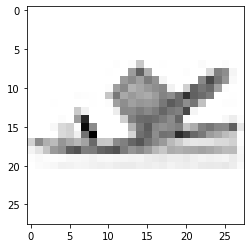

In [35]:
n = 1987
print("神經網路預測這是",class_names[result[n]])
plt.imshow(x_test[n].reshape(28,28), cmap='Greys')

In [36]:
model.save('myCNNmodel_1.h5')

### 參考資料
https://medium.com/@syshen/%E6%94%B9%E5%96%84-cnn-%E8%BE%A8%E8%AD%98%E7%8E%87-dac9fce59b63